# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm

Load feature names.

In [2]:
feature_names = []
with open('./Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print('Loaded feature names:', len(feature_names))

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [3]:
X, Y = [], []

with open('./Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [4]:
def P1():
### STUDENT START ###
    pca_model = PCA(n_components=50)
    pca_model.fit(train_data)
    tot_var = pca_model.explained_variance_ratio_
    print("k","Fraction of Total Variance")
    for k in range(1,50):
        print(k, round(tot_var[k],4))
        
### STUDENT END ###

P1()

k Fraction of Total Variance
1 0.1332
2 0.1017
3 0.0706
4 0.0387
5 0.0368
6 0.0313
7 0.0273
8 0.0262
9 0.0223
10 0.0205
11 0.0187
12 0.0173
13 0.0168
14 0.0152
15 0.0151
16 0.0143
17 0.0141
18 0.0133
19 0.0115
20 0.0107
21 0.0107
22 0.0104
23 0.0099
24 0.0091
25 0.0087
26 0.008
27 0.0078
28 0.0074
29 0.007
30 0.0064
31 0.0061
32 0.0057
33 0.0053
34 0.0053
35 0.005
36 0.005
37 0.0046
38 0.0045
39 0.0044
40 0.0042
41 0.004
42 0.0037
43 0.0036
44 0.0034
45 0.003
46 0.0027
47 0.0024
48 0.0022
49 0.002


(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

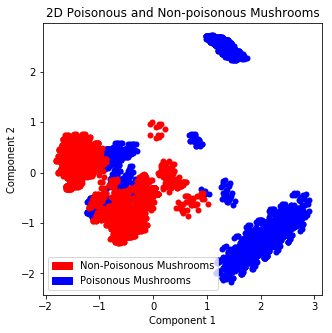

In [5]:
def P2():
### STUDENT START ###
    import matplotlib.patches as mp

    pca_model = PCA(n_components=2)
    pca_model_2 = pca_model.fit_transform(train_data)
    
    poisonous = pca_model_2[train_labels == 1]
    non_poisonous = pca_model_2[train_labels == 0]
    
    plt.figure(figsize = (5, 5))
    plt.plot(poisonous[:,0], poisonous[:,1], "bo", markeredgewidth = 0)
    plt.plot(non_poisonous[:,0], non_poisonous[:,1], "ro", markeredgewidth = 0)
    plt.title("2D Poisonous and Non-poisonous Mushrooms")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    red_patch = mp.Patch(color = 'red', label = 'Non-Poisonous Mushrooms')
    blue_patch = mp.Patch(color ='blue', label = 'Poisonous Mushrooms')
    plt.legend(handles = [red_patch, blue_patch])
    
### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

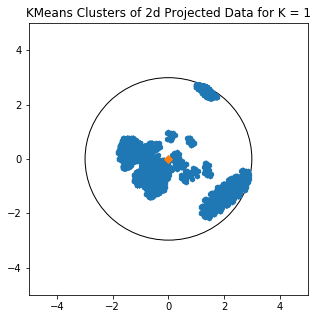

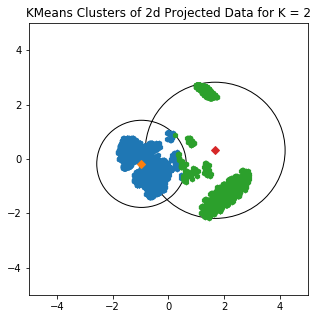

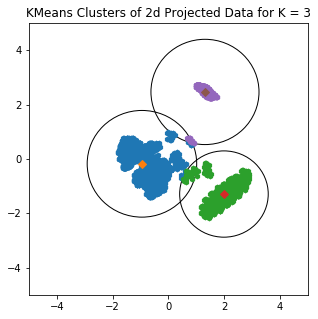

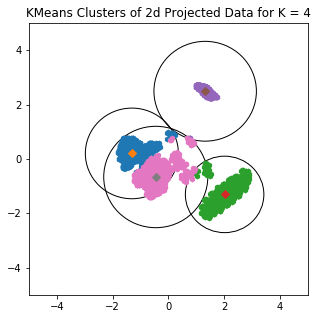

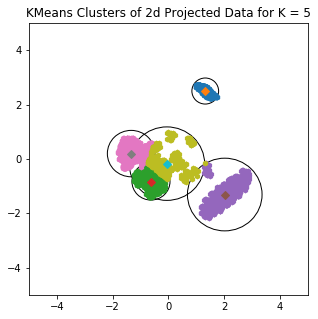

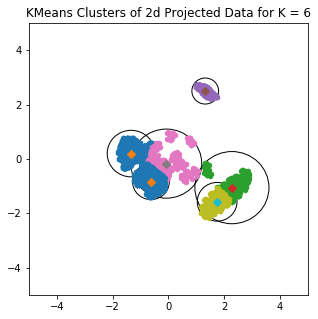

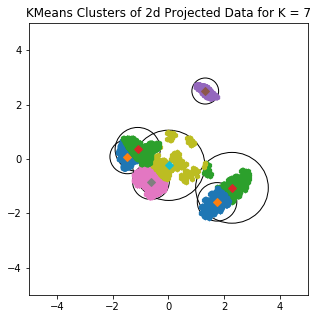

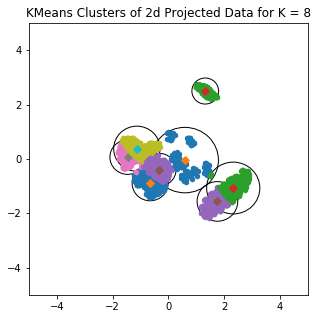

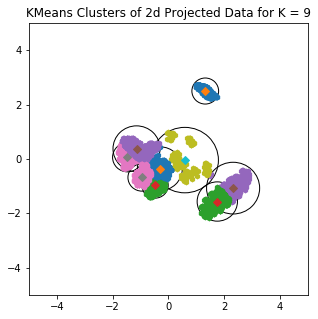

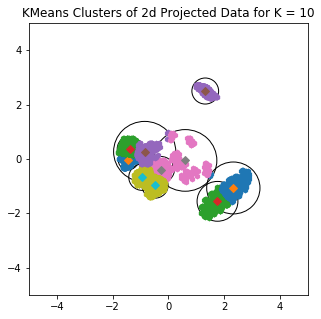

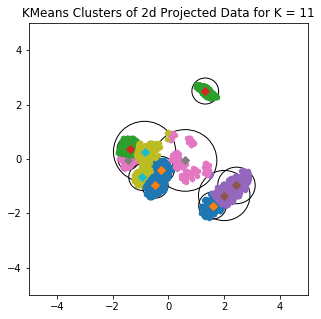

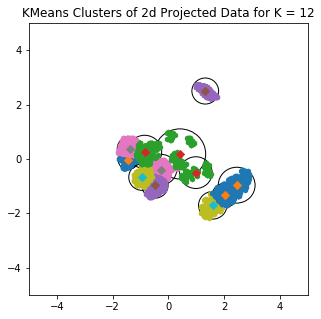

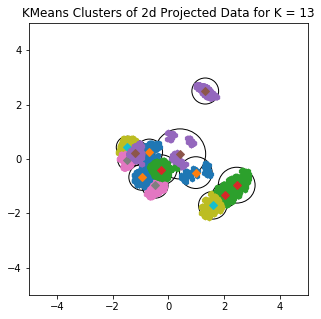

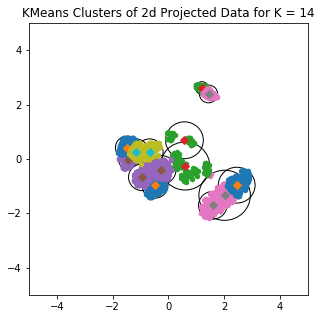

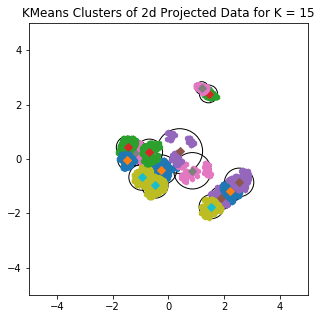

In [6]:
def P3():
### STUDENT START ###
    from matplotlib.patches import Circle
    
    pca_model = PCA(n_components=2)
    pca_model_2 = pca_model.fit_transform(train_data)
    
    for k in range(1,16):
        #create plot
        plt.figure(figsize = (5,5))
        plt.axis([-5,5,-5,5])
        figure = plt.gcf()
        axis = figure.gca()
        
        #create clusters
        k_means_model = KMeans(n_clusters=k)
        k_cluster = k_means_model.fit(pca_model_2)
        
        for k_clusters, coordinates in enumerate(k_means_model.cluster_centers_):
            #plot cluster
            plt.plot(pca_model_2[:,0][k_cluster.labels_ == k_clusters], pca_model_2[:,1]
                    [k_cluster.labels_ == k_clusters], marker = "h", ls = "None", markeredgewidth = 0)
            
            #plot center
            plt.plot(coordinates[0], coordinates[1], marker = "D")
            plt.title("KMeans Clusters of 2d Projected Data for K = %d" % k)
            
            dist = k_cluster.transform(pca_model_2)
            radius = np.amax(dist[k_cluster.labels_ == k_clusters][:,k_clusters])
            
            circle = plt.Circle((coordinates[0], coordinates[1]), radius, fill = False)
            axis.add_patch(circle)
    
### STUDENT END ###

P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

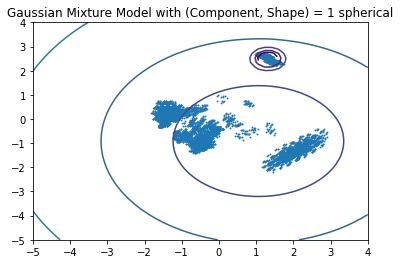

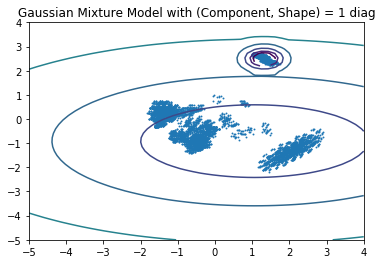

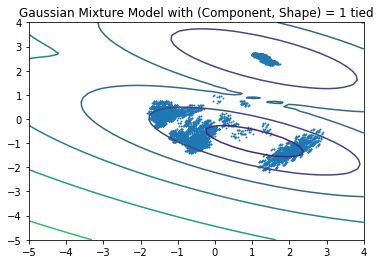

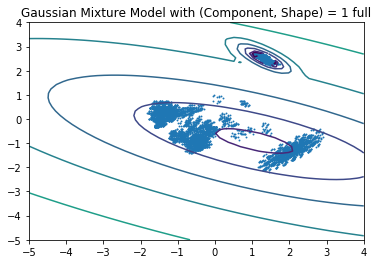

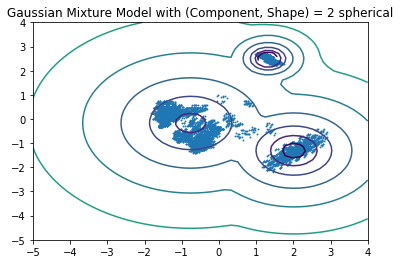

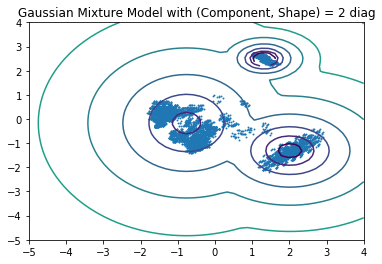

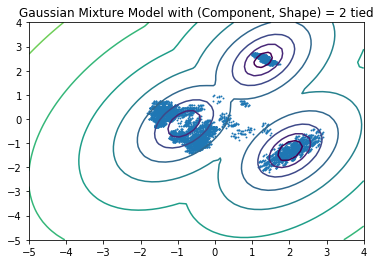

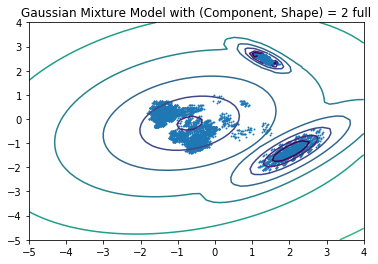

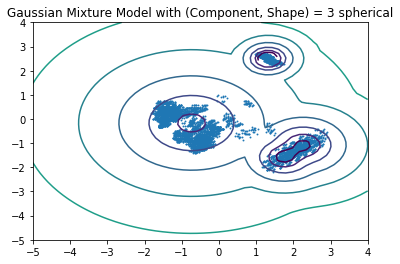

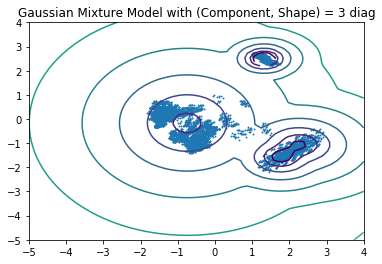

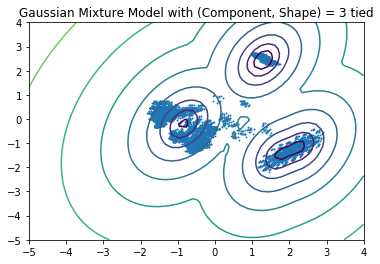

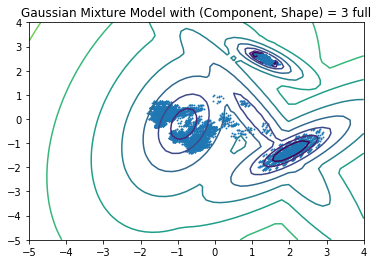

In [7]:
def P4():
### STUDENT START ###
    import warnings
    warnings.filterwarnings('ignore') 
    
    mixture = range(1,4)
    matrix_type = ["spherical", "diag", "tied", "full"]
    
    pca_model = PCA(n_components = 2)
    pca_model_2 = pca_model.fit_transform(train_data)

    poisonous = pca_model_2[train_labels == 1]

    # iterating through the number of mixture compoenents
    for components in mixture:
        
        # iterate through the covariance matrix types
        for index, shape in enumerate(matrix_type):
            
            # fit a Gaussian Mixture Model
            G_mod = GMM(n_components = components+1, covariance_type = shape)
            G_mod.fit(poisonous)

            # display predicted scores by the model as a contour plot
            x = np.linspace(-5, 4)
            y = np.linspace(-5, 4)
            x2, y2 = np.meshgrid(x, y)
            array = np.array([x2.ravel(), y2.ravel()]).T
            z = -G_mod.score_samples(array)[0]
            z = z.reshape(x2.shape)

            CS = plt.contour(x2, y2, z, norm = LogNorm(vmin = 1.0, vmax = 1000.0), levels = np.logspace(0, 3, 10))
            plt.scatter(pca_model_2[:, 0], pca_model_2[:, 1], .8)

            plt.title("Gaussian Mixture Model with (Component, Shape) = %d %s" % (components, shape))
            plt.show()

### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [14]:
def P5():
### STUDENT START ###
    import warnings
    warnings.filterwarnings('ignore') 
    
    pca_model = PCA(n_components = 2)
    pca_model_2 = pca_model.fit_transform(train_data)
    
    poisonous = pca_model_2[train_labels == 1]
    non_poisonous = pca_model_2[train_labels == 0]
    
    #project the test data
    pca_model_2_test = pca_model.transform(test_data)
    
    #fit GMM positive
    GMM_pos = GMM(n_components = 4, covariance_type = "full")
    GMM_pos.fit(poisonous)
    poisonous_prob = GMM_pos.score(pca_model_2_test)

    #fit GMM negative
    GMM_neg = GMM(n_components = 4, covariance_type = "full")
    GMM_neg.fit(non_poisonous)
    non_poisonous_prob = GMM_neg.score(pca_model_2_test)

    
    #predict test examples
    prediction = poisonous_prob > non_poisonous_prob
    
    #calculate accuracy
    score = (prediction == test_labels).sum() / len(test_labels)
    print("2 4-component full covariance GMM accuracy:", round(score*100, 2),"%")
    
    
### STUDENT END ###

P5()

2 4-component full covariance GMM accuracy: 95.11 %


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [15]:
def P6():
### STUDENT START ###
    import warnings
    warnings.filterwarnings('ignore') 
    from astropy.table import Table

    pca_list = []
    gmm_list = []
    shape_list = []
    accuracy_list = []
    
    pca_components = range(1,51)
    gmm_components = range(1,51)
    matrix_type = ["spherical", "diag", "tied", "full"]
    
    # PCA components
    for p in pca_components:
        # iterate through covariance matrix types
        for index, shape in enumerate(matrix_type):
            # iterate through GMM components
            for g in gmm_components:
                pca_list.append(p)
                gmm_list.append(g)
                shape_list.append(shape)
                
                if shape == "spherical":
                    cov_matrix = 1
                elif shape == "diag":
                    cov_matrix = p
                elif shape == "tied":
                    cov_matrix = 0.5 * p * (p + 1)
                elif shape == "full":
                    cov_matrix = 0.5 * p * (p + 1)
                    
                total = ((p + cov_matrix) * g) * 2
                
                if total > 50:
                    pass
                
                else:
                    #project training data 
                    pca_model = PCA(n_components = p)
                    pca_model_train = pca_model.fit_transform(train_data)
                    pca_model_test = pca_model.transform(test_data)
                    
                    #get the training labels
                    poisonous = pca_model_train[train_labels == 1]
                    non_poisonous = pca_model_train[train_labels == 0]

                    #fit GMM positive labels
                    GMM_pos_model = GMM(n_components= g, covariance_type = shape)
                    GMM_pos_model.fit(poisonous)
                    poisonous_prob = GMM_pos_model.score(pca_model_test)
                    
                    #fit GMM negative labels
                    GMM_neg_model = GMM(n_components= g, covariance_type = shape)
                    GMM_neg_model.fit(non_poisonous)
                    non_poisonous_prob = GMM_neg_model.score(pca_model_test)
                    
                    prediction = poisonous_prob > non_poisonous_prob
                    score = (prediction == test_labels).sum() / len(test_labels)
                accuracy_list.append(score)

    accuracy_table = Table([[p for p in pca_list], 
                            [g for g in gmm_list], 
                            [s for s in shape_list], 
                            [a for a in accuracy_list]], 
                           names = ("PCA Components", "GMM Components", "Covariance Type", "Accuracy"))
    accuracy_table.sort("Accuracy")
    print(accuracy_table[-1])
    
### STUDENT END ###

P6()

PCA Components GMM Components Covariance Type    Accuracy   
-------------- -------------- --------------- --------------
             7              6       spherical 0.973309608541
